In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

In [72]:
df = pd.read_csv("./UNSW_NB15_training-set.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
dur,0.000011,0.000008,0.000005,0.000006,0.00001,0.000003,0.000006,0.000028,0.0,0.0
proto,udp,udp,udp,udp,udp,udp,udp,udp,arp,arp
service,-,-,-,-,-,-,-,-,-,-
state,INT,INT,INT,INT,INT,INT,INT,INT,INT,INT
spkts,2,2,2,2,2,2,2,2,1,1
dpkts,0,0,0,0,0,0,0,0,0,0
sbytes,496,1762,1068,900,2126,784,1960,1384,46,46
dbytes,0,0,0,0,0,0,0,0,0,0
rate,90909.0902,125000.0003,200000.0051,166666.6608,100000.0025,333333.3215,166666.6608,35714.28522,0.0,0.0


In [73]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

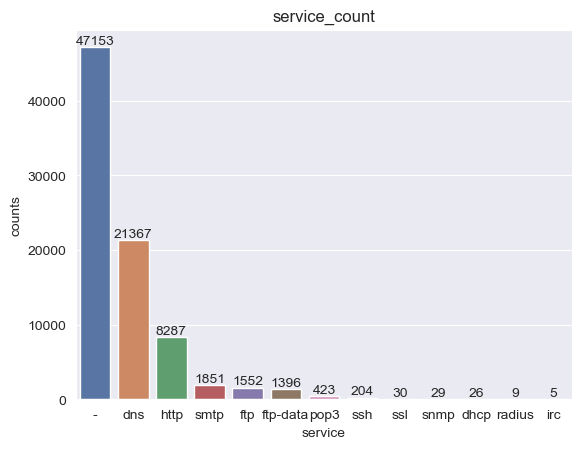

In [75]:
service_count = df.service.value_counts()
ax = sns.barplot(x=service_count.index, y=service_count.values, palette='deep')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("service_count")
plt.xlabel("service")
plt.ylabel("counts")
plt.show()

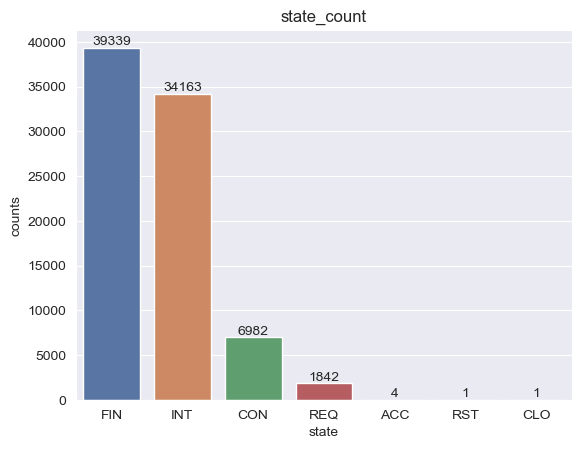

In [76]:
state_count = df.state.value_counts()
ax = sns.barplot(x=state_count.index, y=state_count.values, palette='deep')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("state_count")
plt.xlabel("state")
plt.ylabel("counts")
plt.show()

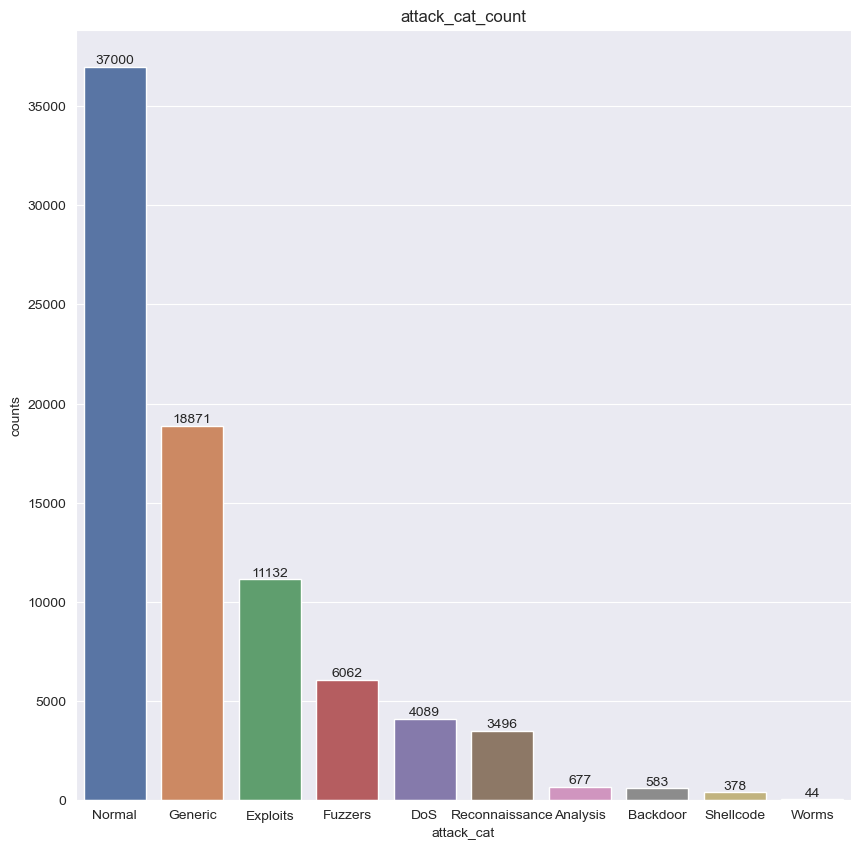

In [77]:
attack_cat_count = df.attack_cat.value_counts()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=attack_cat_count.index, y=attack_cat_count.values, palette='deep')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("attack_cat_count")
plt.xlabel("attack_cat")
plt.ylabel("counts")
plt.show()

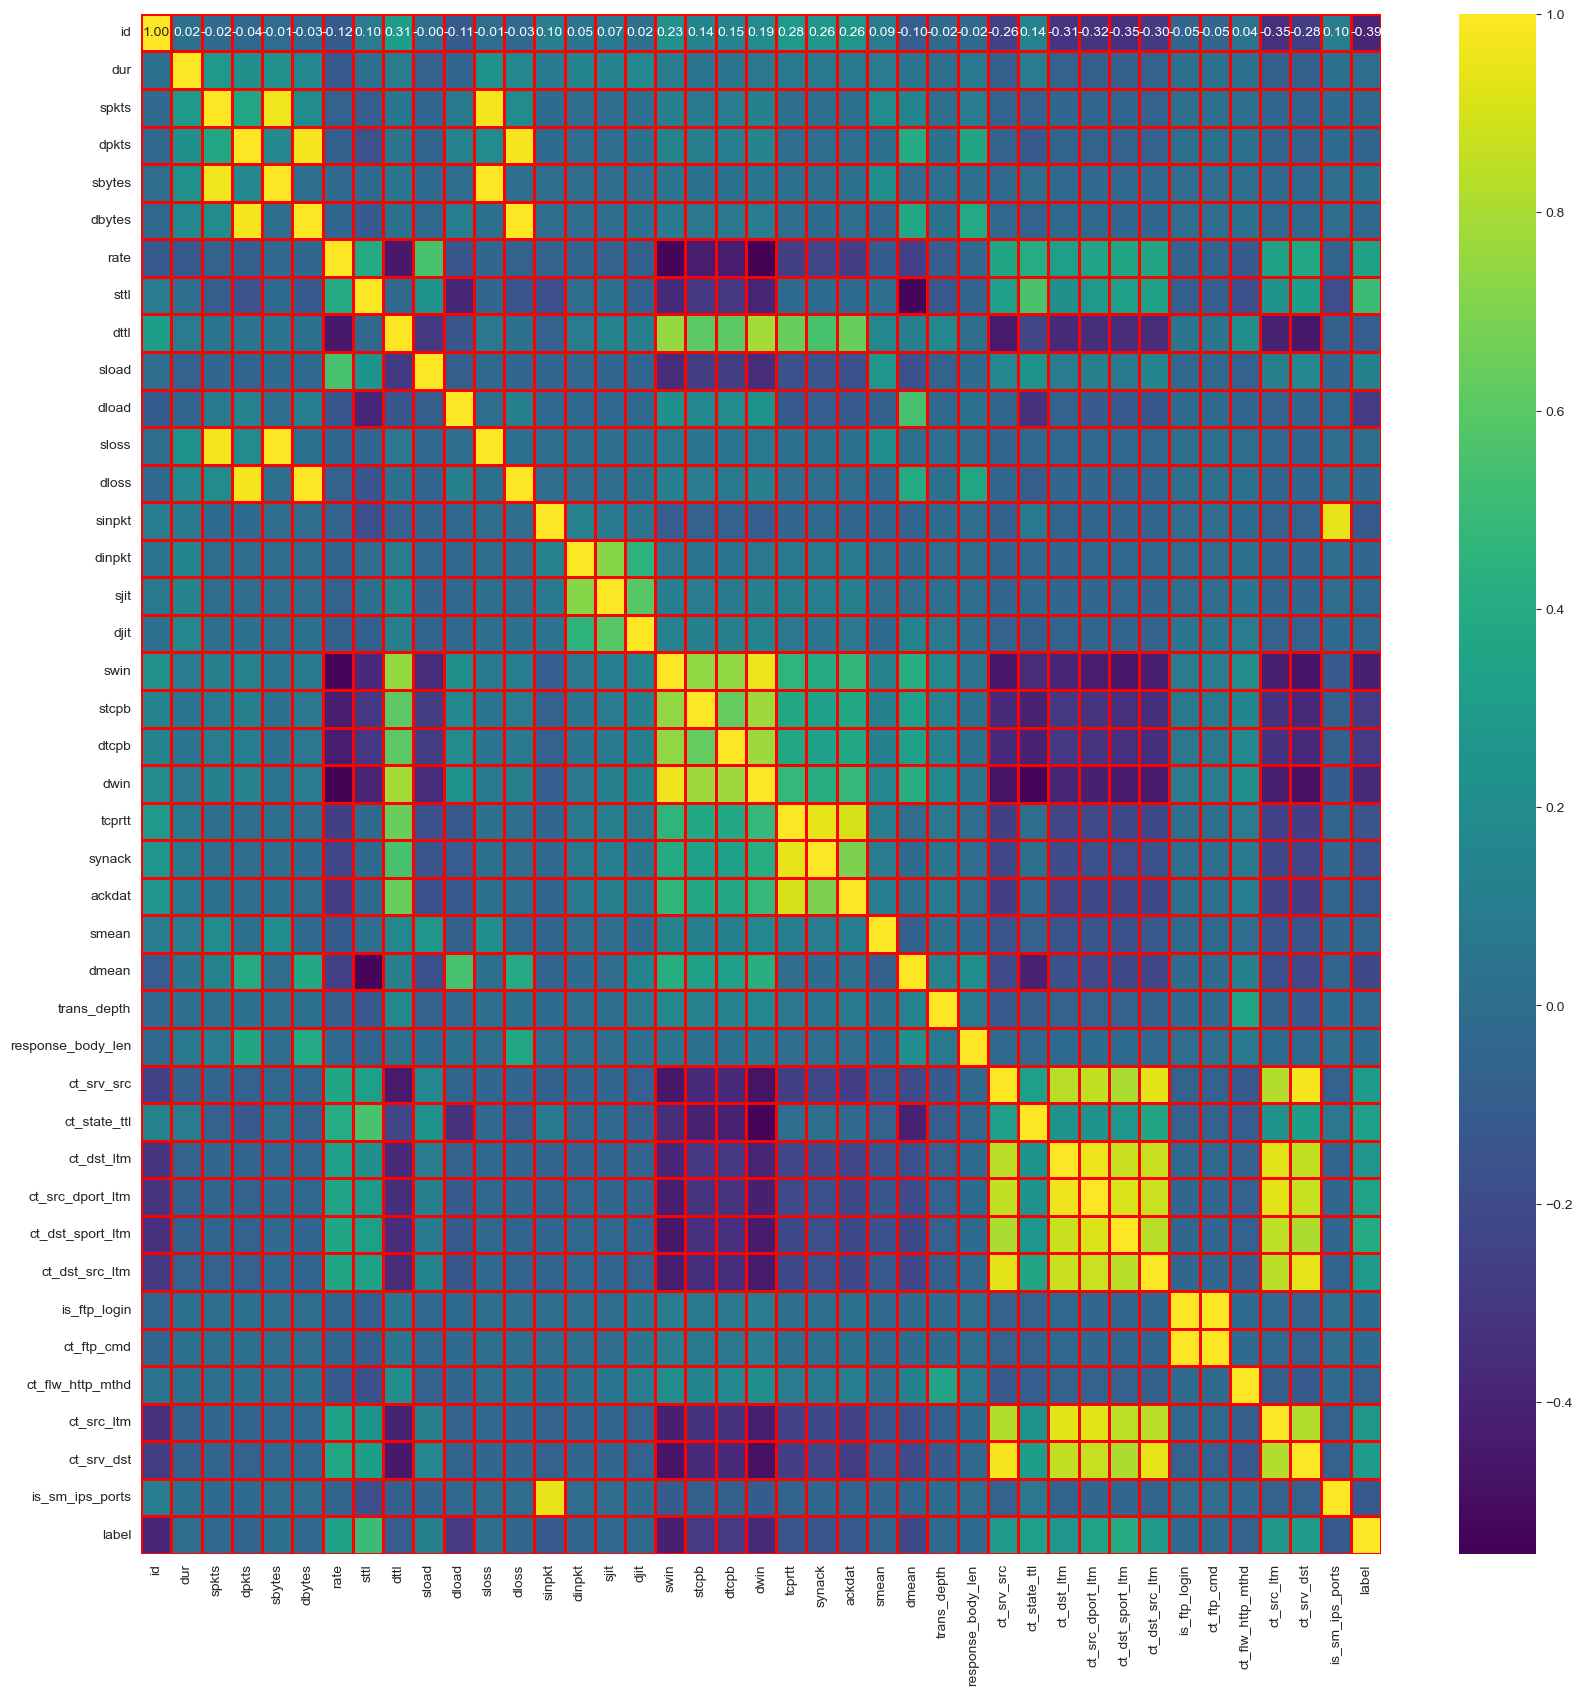

In [78]:
cross_matrix = df.corr(numeric_only=True)
sns.set_style(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(cross_matrix, annot=True, fmt='.2f', linewidths=1, linecolor='red', cmap='viridis')
plt.show()

In [79]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [80]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

proto
service
state
attack_cat


In [81]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 82332 non-null  int64   
 1   dur                82332 non-null  float64 
 2   proto              82332 non-null  category
 3   service            82332 non-null  category
 4   state              82332 non-null  category
 5   spkts              82332 non-null  int64   
 6   dpkts              82332 non-null  int64   
 7   sbytes             82332 non-null  int64   
 8   dbytes             82332 non-null  int64   
 9   rate               82332 non-null  float64 
 10  sttl               82332 non-null  int64   
 11  dttl               82332 non-null  int64   
 12  sload              82332 non-null  float64 
 13  dload              82332 non-null  float64 
 14  sloss              82332 non-null  int64   
 15  dloss              82332 non-null  int64   
 16  sinp

In [83]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  int16  
 3   service            82332 non-null  int8   
 4   state              82332 non-null  int8   
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [85]:
feature = df.drop(columns=['id', 'attack_cat', 'label'])
target = df.label

In [61]:
# scalar = StandardScaler()
# transformed_df = scalar.fit_transform(feature)

In [86]:
feature_transformed_df = pd.DataFrame(feature)
feature_transformed_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,118,1,5,2,0,496,0,90909.090200,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,118,1,5,2,0,1762,0,125000.000300,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,118,1,5,2,0,1068,0,200000.005100,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,118,1,5,2,0,900,0,166666.660800,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,118,1,5,2,0,2126,0,100000.002500,254,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,118,1,5,2,0,104,0,200000.005100,254,...,2,1,1,2,0,0,0,2,1,0
82328,1.106101,112,1,4,20,8,18062,354,24.410067,254,...,2,1,1,1,0,0,0,3,2,0
82329,0.000000,7,1,5,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1
82330,0.000000,7,1,5,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,0,1,1,1


# Train Isolation Forest Model

In [87]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(feature_transformed_df)

IsolationForest(contamination=0.1, random_state=42)

# Predict anomalies (`1` for anomaly, `0` for normal)

In [88]:
anomalies_iso_forest = iso_forest.predict(feature_transformed_df)
anomalies_iso_forest = [1 if x == -1 else 0 for x in anomalies_iso_forest]

In [89]:
anomalies_iso_forest[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

# Evaluate the Isolation Forest model

In [90]:
iso_forest_report = classification_report(target, anomalies_iso_forest)
iso_forest_roc_auc = roc_auc_score(target, anomalies_iso_forest)
print(iso_forest_report)
print("ROC_AUC_SCORE: ", iso_forest_roc_auc)

              precision    recall  f1-score   support

           0       0.44      0.89      0.59     37000
           1       0.50      0.09      0.15     45332

    accuracy                           0.45     82332
   macro avg       0.47      0.49      0.37     82332
weighted avg       0.47      0.45      0.35     82332

ROC_AUC_SCORE:  0.48892878844608306


# Train Autoencoder Model:

In [91]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

In [97]:
# standardized the features
scalar = StandardScaler()
features_scaled = scalar.fit_transform(feature)

In [98]:
# Building the autoencoder model
input_dim = featured_scaled.shape[1]
encoding_dim = 14 # Number of nodes in the encoding layer

In [100]:
input_layer = Input(shape = (input_dim, ))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
encoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)
autoencoder = Model(inputs = input_layer, outputs = decoder)

# Compiling the autoencoder

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Training the autoencoder

autoencoder.fit(features_scaled, features_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Getting the reconstruction errors
reconstructed = autoencoder.predict(features_scaled)
mse = np.mean(np.power(features_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 95)  # Setting the threshold for anomaly detection
anomalies_autoencoder = mse > threshold

# Evaluate the Autoencoder model
autoencoder_report = classification_report(target, anomalies_autoencoder)
autoencoder_roc_auc = roc_auc_score(target, anomalies_autoencoder)

print(autoencoder_report)
print('ROC-AUC Score:', autoencoder_roc_auc)

Epoch 1/50
258/258 [==============================] - 2s 4ms/step - loss: 0.9856 - val_loss: 1.0105
Epoch 2/50
258/258 [==============================] - 1s 3ms/step - loss: 0.7573 - val_loss: 0.8943
Epoch 3/50
258/258 [==============================] - 1s 3ms/step - loss: 0.7272 - val_loss: 0.8469
Epoch 4/50
258/258 [==============================] - 1s 3ms/step - loss: 0.7113 - val_loss: 0.8285
Epoch 5/50
258/258 [==============================] - 1s 3ms/step - loss: 0.7036 - val_loss: 0.8223
Epoch 6/50
258/258 [==============================] - 1s 3ms/step - loss: 0.7004 - val_loss: 0.8194
Epoch 7/50
258/258 [==============================] - 1s 3ms/step - loss: 0.6983 - val_loss: 0.8159
Epoch 8/50
258/258 [==============================] - 1s 3ms/step - loss: 0.6962 - val_loss: 0.8171
Epoch 9/50
258/258 [==============================] - 1s 3ms/step - loss: 0.6938 - val_loss: 0.8132
Epoch 10/50
258/258 [==============================] - 1s 3ms/step - loss: 0.6920 - val_loss: 0.8108